In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('D:\Flood Prediction\data\dataset_mitigasi_banjir_fix_banget.csv')


<>:6: SyntaxWarning: invalid escape sequence '\F'
<>:6: SyntaxWarning: invalid escape sequence '\F'
C:\Users\UsHER\AppData\Local\Temp\ipykernel_3608\56386560.py:6: SyntaxWarning: invalid escape sequence '\F'
  data = pd.read_csv('D:\Flood Prediction\data\dataset_mitigasi_banjir_fix_banget.csv')


In [2]:
data.head()

,Tanggal,curah_hujan_DK,curah_hujan_BS,debit_sungai_m3_per_detik,tinggi_muka_air_m
0,2015-01-01,33.0,1.0,130.50,5.63
1,2015-01-02,0.0,NaN,93.50,4.98
2,2015-01-03,0.0,20.5,79.12,4.69
3,2015-01-04,11.5,2.0,91.08,4.94
4,2015-01-05,2.0,NaN,76.00,4.61


In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Tanggal                    3287 non-null   object 
 1   curah_hujan_DK             1535 non-null   float64
 2   curah_hujan_BS             1612 non-null   float64
 3   debit_sungai_m3_per_detik  3283 non-null   float64
 4   tinggi_muka_air_m          2555 non-null   float64
dtypes: float64(4), object(1)
memory usage: 128.5+ KB


,curah_hujan_DK,curah_hujan_BS,debit_sungai_m3_per_detik,tinggi_muka_air_m
count,1535.000000,1612.000000,3283.000000,2555.000000
mean,13.215049,12.113462,52.323049,4.245816
std,17.411623,16.120932,47.775949,1.011360
min,0.000000,0.000000,6.990000,2.470000
25%,1.500000,1.000000,23.065000,3.400000
50%,6.500000,5.500000,36.740000,4.070000
75%,18.000000,16.500000,65.775000,4.960000
max,124.000000,127.000000,422.380000,7.640000


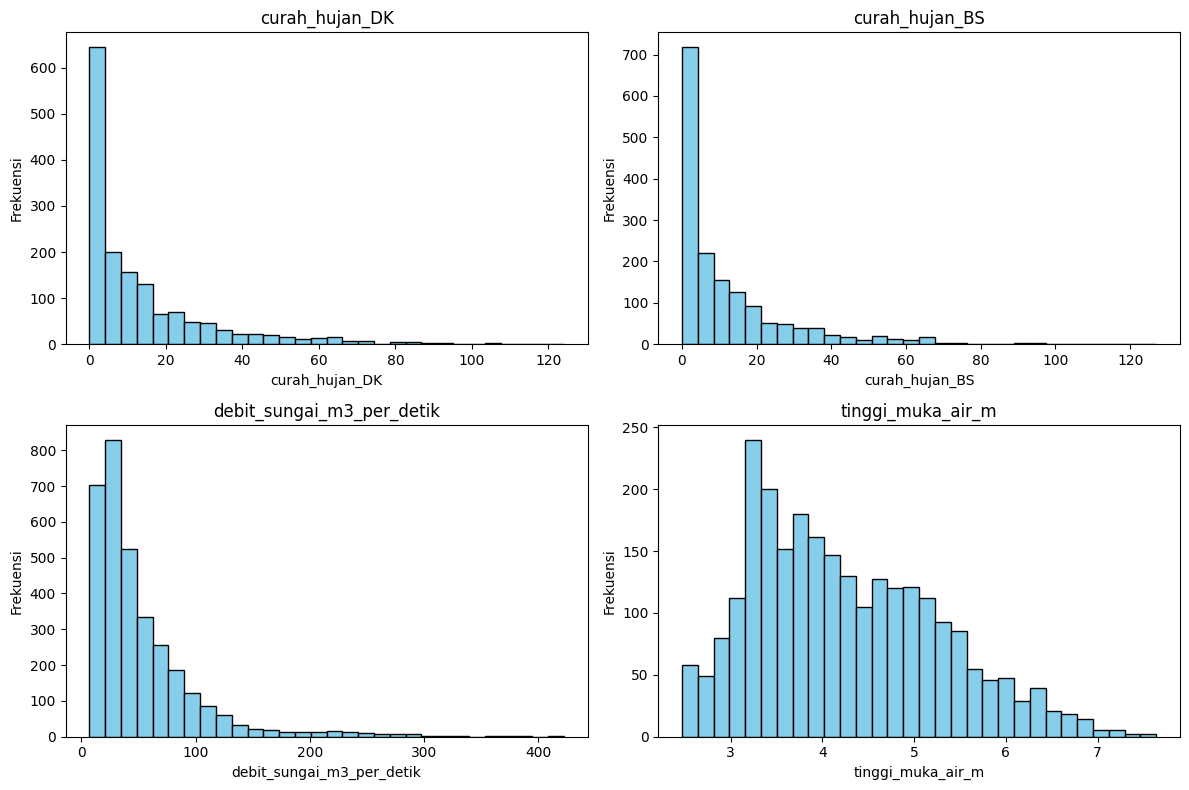

In [4]:
columns_to_plot = ['curah_hujan_DK', 'curah_hujan_BS', 'debit_sungai_m3_per_detik', 'tinggi_muka_air_m']

# Membuat subplots (2 baris x 2 kolom)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# Looping tiap kolom untuk membuat histogram
for i, col in enumerate(columns_to_plot):
    axes[i].hist(data[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

Penjelasan
1. curah_hujan_DK skewed right ini menunjukkan sebagian besar hari mengalami kondisi hujan ringan/tidak hujan dengan sedikit yang intensitasnya tinggi

2. curah_hujan_BS hampir mirip dengan DK, skewed right

notes : kedua diatas masuk akal terlebih INA merupakan negara tropis (kadang hujan kadang tidak hujan sama sekali dan kadang hujan dengan intensitas tinggi)

3. tinggi_muka_air_m persebarannya di range 4-5 meter, dengan sedikit kejadian ekstrem di luar range tersebut

4. debit_sungai_m3_per_detik sebagian besar di kisaran debit normal, right skewed.

In [5]:
df = data.copy()

In [6]:
df.head()

,Tanggal,curah_hujan_DK,curah_hujan_BS,debit_sungai_m3_per_detik,tinggi_muka_air_m
0,2015-01-01,33.0,1.0,130.50,5.63
1,2015-01-02,0.0,NaN,93.50,4.98
2,2015-01-03,0.0,20.5,79.12,4.69
3,2015-01-04,11.5,2.0,91.08,4.94
4,2015-01-05,2.0,NaN,76.00,4.61


In [7]:
df.isna().sum()

Tanggal                         0
curah_hujan_DK               1752
curah_hujan_BS               1675
debit_sungai_m3_per_detik       4
tinggi_muka_air_m             732
dtype: int64

In [8]:
total_rows = len(df)
missing_percent = (df.isna().sum() / total_rows) * 100
print(missing_percent)

Tanggal                       0.000000
curah_hujan_DK               53.300882
curah_hujan_BS               50.958321
debit_sungai_m3_per_detik     0.121692
tinggi_muka_air_m            22.269547
dtype: float64


In [9]:
#debit sungai null values hanya 0.12% drop aja

df.dropna(subset=['debit_sungai_m3_per_detik'])

,Tanggal,curah_hujan_DK,curah_hujan_BS,debit_sungai_m3_per_detik,tinggi_muka_air_m
0,2015-01-01,33.0,1.0,130.50,5.63
1,2015-01-02,0.0,NaN,93.50,4.98
2,2015-01-03,0.0,20.5,79.12,4.69
3,2015-01-04,11.5,2.0,91.08,4.94
4,2015-01-05,2.0,NaN,76.00,4.61
...,...,...,...,...,...
3282,2023-12-27,7.0,2.5,98.07,NaN
3283,2023-12-28,15.0,15.0,94.45,NaN
3284,2023-12-29,19.5,20.0,76.01,NaN
3285,2023-12-30,18.5,12.5,69.24,NaN


In [10]:
#median imputation untuk tinggi_muka_air_m karena missing_percent moderate (22%)

median_tma = df['tinggi_muka_air_m'].median()
df['tinggi_muka_air_m'].fillna(median_tma, inplace=True)
print(df)


         Tanggal  curah_hujan_DK  curah_hujan_BS  debit_sungai_m3_per_detik  \
0     2015-01-01            33.0             1.0                     130.50   
1     2015-01-02             0.0             NaN                      93.50   
2     2015-01-03             0.0            20.5                      79.12   
3     2015-01-04            11.5             2.0                      91.08   
4     2015-01-05             2.0             NaN                      76.00   
...          ...             ...             ...                        ...   
3282  2023-12-27             7.0             2.5                      98.07   
3283  2023-12-28            15.0            15.0                      94.45   
3284  2023-12-29            19.5            20.0                      76.01   
3285  2023-12-30            18.5            12.5                      69.24   
3286  2023-12-31            33.0            15.0                      88.94   

      tinggi_muka_air_m  
0                  5.63  

C:\Users\UsHER\AppData\Local\Temp\ipykernel_3608\793296504.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tinggi_muka_air_m'].fillna(median_tma, inplace=True)


In [11]:
print(df.index.name)
df.reset_index(inplace=True)

df.columns = df.columns.str.strip()
print("Nama kolom:", df.columns)
df.head()

None
Nama kolom: Index(['index', 'Tanggal', 'curah_hujan_DK', 'curah_hujan_BS',
       'debit_sungai_m3_per_detik', 'tinggi_muka_air_m'],
      dtype='object')


,index,Tanggal,curah_hujan_DK,curah_hujan_BS,debit_sungai_m3_per_detik,tinggi_muka_air_m
0,0,2015-01-01,33.0,1.0,130.50,5.63
1,1,2015-01-02,0.0,NaN,93.50,4.98
2,2,2015-01-03,0.0,20.5,79.12,4.69
3,3,2015-01-04,11.5,2.0,91.08,4.94
4,4,2015-01-05,2.0,NaN,76.00,4.61


In [12]:
#Interpolasi data curah hujan dk dan bs karena missing_percent lebih dari 50%

df.reset_index(inplace=True)
print(df.columns)

# Pastikan kolom Tanggal ada dan ubah ke datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

# Urutkan berdasarkan Tanggal dan set Tanggal sebagai index
df.sort_values('Tanggal', inplace=True)
df.set_index('Tanggal', inplace=True)

# Lakukan interpolasi berbasis waktu pada kolom curah_hujan_DK dan curah_hujan_BS
df['curah_hujan_DK'] = df['curah_hujan_DK'].interpolate(method='time')
df['curah_hujan_BS'] = df['curah_hujan_BS'].interpolate(method='time')

# Tampilkan beberapa baris untuk verifikasi
print(df[['curah_hujan_DK', 'curah_hujan_BS']].head())

Index(['level_0', 'index', 'Tanggal', 'curah_hujan_DK', 'curah_hujan_BS',
       'debit_sungai_m3_per_detik', 'tinggi_muka_air_m'],
      dtype='object')
            curah_hujan_DK  curah_hujan_BS
Tanggal                                   
2015-01-01            33.0        1.000000
2015-01-02             0.0       10.750000
2015-01-03             0.0       20.500000
2015-01-04            11.5        2.000000
2015-01-05             2.0        1.666667


In [13]:
df.isna().sum()

level_0                      0
index                        0
curah_hujan_DK               0
curah_hujan_BS               0
debit_sungai_m3_per_detik    4
tinggi_muka_air_m            0
dtype: int64

In [14]:
df.head()

,level_0,index,curah_hujan_DK,curah_hujan_BS,debit_sungai_m3_per_detik,tinggi_muka_air_m
Tanggal,,,,,,
2015-01-01,0,0,33.0,1.000000,130.50,5.63
2015-01-02,1,1,0.0,10.750000,93.50,4.98
2015-01-03,2,2,0.0,20.500000,79.12,4.69
2015-01-04,3,3,11.5,2.000000,91.08,4.94
2015-01-05,4,4,2.0,1.666667,76.00,4.61


In [15]:
df.drop(columns=['level_0', 'index'], inplace=True, errors='ignore')


In [16]:
df.head()

,curah_hujan_DK,curah_hujan_BS,debit_sungai_m3_per_detik,tinggi_muka_air_m
Tanggal,,,,
2015-01-01,33.0,1.000000,130.50,5.63
2015-01-02,0.0,10.750000,93.50,4.98
2015-01-03,0.0,20.500000,79.12,4.69
2015-01-04,11.5,2.000000,91.08,4.94
2015-01-05,2.0,1.666667,76.00,4.61


In [17]:
df.tail()

,curah_hujan_DK,curah_hujan_BS,debit_sungai_m3_per_detik,tinggi_muka_air_m
Tanggal,,,,
2023-12-27,7.0,2.5,98.07,4.07
2023-12-28,15.0,15.0,94.45,4.07
2023-12-29,19.5,20.0,76.01,4.07
2023-12-30,18.5,12.5,69.24,4.07
2023-12-31,33.0,15.0,88.94,4.07


In [18]:
df.isna().sum()

curah_hujan_DK               0
curah_hujan_BS               0
debit_sungai_m3_per_detik    4
tinggi_muka_air_m            0
dtype: int64

In [19]:
df['debit_sungai_m3_per_detik'] = df['debit_sungai_m3_per_detik'].interpolate(method='time')

In [20]:
df.isna().sum()

curah_hujan_DK               0
curah_hujan_BS               0
debit_sungai_m3_per_detik    0
tinggi_muka_air_m            0
dtype: int64

In [21]:
#buat kolom baru misal banjir

threshold_banjir = 5.0

# Buat kolom banjir (1 jika tinggi_muka_air_m > 5, else 0)
df['banjir'] = np.where(df['tinggi_muka_air_m'] > threshold_banjir, 1, 0)

# Cek beberapa baris untuk memastikan kolom 'banjir' sudah terbentuk
print(df[['tinggi_muka_air_m', 'banjir']].head(50))

            tinggi_muka_air_m  banjir
Tanggal                              
2015-01-01               5.63       1
2015-01-02               4.98       0
2015-01-03               4.69       0
2015-01-04               4.94       0
2015-01-05               4.61       0
2015-01-06               4.14       0
2015-01-07               4.19       0
2015-01-08               3.80       0
2015-01-09               3.64       0
2015-01-10               3.52       0
2015-01-11               3.58       0
2015-01-12               3.35       0
2015-01-13               3.45       0
2015-01-14               3.73       0
2015-01-15               3.77       0
2015-01-16               3.67       0
2015-01-17               3.54       0
2015-01-18               3.50       0
2015-01-19               3.51       0
2015-01-20               3.61       0
2015-01-21               4.80       0
2015-01-22               5.16       1
2015-01-23               4.54       0
2015-01-24               4.57       0
2015-01-25  

In [22]:
df.head()

,curah_hujan_DK,curah_hujan_BS,debit_sungai_m3_per_detik,tinggi_muka_air_m,banjir
Tanggal,,,,,
2015-01-01,33.0,1.000000,130.50,5.63,1
2015-01-02,0.0,10.750000,93.50,4.98,0
2015-01-03,0.0,20.500000,79.12,4.69,0
2015-01-04,11.5,2.000000,91.08,4.94,0
2015-01-05,2.0,1.666667,76.00,4.61,0


In [23]:
df.to_excel("data_flood_processed.xlsx", index=False)